In [0]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.colors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
import time
import seaborn as sns
from tqdm import tqdm_notebook
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
import math
import torch.nn.functional as Fun
import torch.nn as nn
from torch import optim

In [104]:
torch.manual_seed(0)

In [0]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

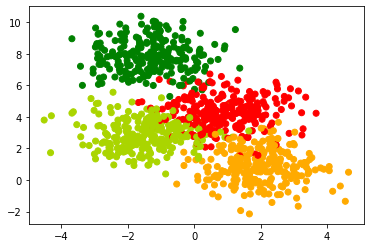

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = my_cmap)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, stratify = Y, random_state = 0)

In [0]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [110]:
print(X_train.shape, X_val.shape, Y_val.shape)

torch.Size([750, 2]) torch.Size([250, 2]) torch.Size([250])


In [0]:
#enc = OneHotEncoder()
#Y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1))


In [0]:
def model(x):
  A1 = torch.matmul(x, w1) + b1     
  H1 = torch.sigmoid(A1)
  A2 = torch.matmul(H1, w2) + b2
  H2 = A2.exp() / A2.exp().sum(-1).unsqueeze(-1)              # try
  return H2

In [112]:
y = torch.tensor([2, 0])
y_hat = torch.tensor(([0.2, 0.3, 0.4, 0.1], [0.7, 0.1, 0.1, 0.1]))
print((-y_hat[range(y_hat.shape[0]), y].log()).mean().item())
(np.argmax(y_hat, 1) == y).float().mean().item()

0.636482834815979


1.0

In [0]:
def loss_fun(y_hat_loss, y_loss):
  return (-y_hat_loss[range(y_hat_loss.shape[0]), y_loss].log()).mean()

In [0]:
def get_accuracy(y_hat_acc, y_acc):
  return (torch.argmax(y_hat_acc, 1) == y_acc).float().mean()

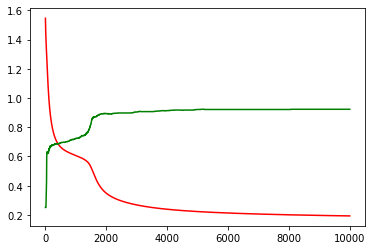

Loss befor training: 1.5456441640853882
loss after training: 0.19288592040538788
Accuracy before training: 0.25066667795181274
Accuracy after training: 0.9226666688919067


In [115]:
torch.manual_seed(0)
w1 = torch.randn(2, 2) / math.sqrt(2)
w1.requires_grad = True
w2 = torch.randn(2, 4) / math.sqrt(2)
w2.requires_grad = True
b1 = torch.zeros(2, requires_grad=True)
b2 = torch.zeros(4, requires_grad=True)

epochs = 10000
eta = 0.2

X_train = X_train.float()
Y_train = Y_train.long()

loss_metric, accuracy_metric = [], []

for i in range(epochs):
  Y_hat = model(X_train)
  loss = loss_fun(Y_hat, Y_train)
  acc = get_accuracy(Y_hat, Y_train)
  loss.backward()
  loss_metric.append(loss.item())
  accuracy_metric.append(acc.item())

  with torch.no_grad():
    w1 -= w1.grad * eta
    w2 -= w2.grad * eta
    b1 -= b1.grad * eta
    b2 -= b2.grad * eta
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()

plt.plot(loss_metric, 'r-')
plt.plot(accuracy_metric,  'g-')
plt.show()
print("Loss befor training:", loss_metric[0])
print("loss after training:", loss_metric[-1])
print("Accuracy before training:", accuracy_metric[0])
print("Accuracy after training:", accuracy_metric[-1])

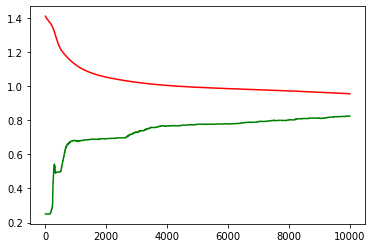

Loss befor training: 1.4111980199813843
loss after training: 0.9561843276023865
Accuracy before training: 0.25066667795181274
Accuracy after training: 0.8253333568572998


In [116]:
torch.manual_seed(0)
w1 = torch.randn(2, 2) / math.sqrt(2)
w1.requires_grad = True
w2 = torch.randn(2, 4) / math.sqrt(2)
w2.requires_grad = True
b1 = torch.zeros(2, requires_grad=True)
b2 = torch.zeros(4, requires_grad=True)

epochs = 10000
eta = 0.2

X_train = X_train.float()
Y_train = Y_train.long()

loss_metric, accuracy_metric = [], []

for i in range(epochs):
  Y_hat = model(X_train)
  loss = Fun.cross_entropy(Y_hat, Y_train)
  acc = get_accuracy(Y_hat, Y_train)
  loss.backward()
  loss_metric.append(loss.item())
  accuracy_metric.append(acc.item())

  with torch.no_grad():
    w1 -= w1.grad * eta
    w2 -= w2.grad * eta
    b1 -= b1.grad * eta
    b2 -= b2.grad * eta
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()

plt.plot(loss_metric, 'r-')
plt.plot(accuracy_metric,  'g-')
plt.show()
print("Loss befor training:", loss_metric[0])
print("loss after training:", loss_metric[-1])
print("Accuracy before training:", accuracy_metric[0])
print("Accuracy after training:", accuracy_metric[-1])

In [0]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.w1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.w2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.b1 = nn.Parameter(torch.ones(2))
    self.b2 = nn.Parameter(torch.ones(4))
  
  def forward(self, X):
    a1 = torch.matmul(X, self.w1)+self.b1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.w2)+self.b2
    h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
    return h2


In [0]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
    
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [0]:
def fit(epochs=1000, lr = 1):
  accuracy_metric, loss_metric = [], []
  for i in range(epochs):
    y_hat = fn(X_train)
    loss = Fun.cross_entropy(y_hat, Y_train)
    loss_metric.append(loss.item())
    accuracy_metric.append(get_accuracy(y_hat, Y_train))
    loss.backward()
    with torch.no_grad():
      for params in fn.parameters():
        params -= lr * params.grad
      fn.zero_grad()

  plt.plot(loss_metric, '-r')
  plt.plot(accuracy_metric, '-g')
  plt.show()
  print(loss_metric[0])
  print(loss_metric[-1])

In [0]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = Fun.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(get_accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

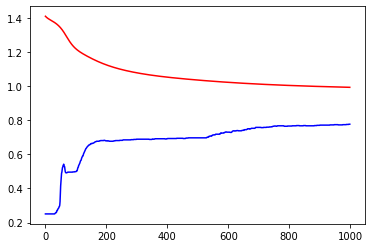

Loss before training 1.4111980199813843
Loss after training 0.9939236640930176


In [121]:
fn = FirstNetwork()
fit()

In [0]:
class FirstNetwork_v1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.layer1 = nn.Linear(2, 2)
    self.layer2 = nn.Linear(2, 4)
  
  def forward(self,X):
    a1 = self.layer1(X)
    h1 = a1.sigmoid()
    a2 = self.layer2(h1)
    h2 = a2.exp() / a2.exp().sum(-1).unsqueeze(-1)
    return h2

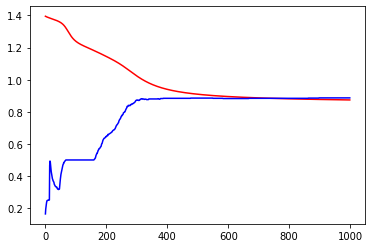

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [123]:
fn = FirstNetwork_v1()
fit()

In [0]:
def fit(epochs = 1000, learning_rate = 0.2):
  loss_arr = []
  acc_arr = []
  
  opt = optim.Adagrad(fn.parameters(), learning_rate, lr_decay=0.01)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = Fun.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(get_accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

In [0]:
class FirstNetwork_v1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2),
        nn.LeakyReLU(),
        nn.Linear(2, 4),
        nn.Softmax()
    )
  
  def forward(self,X):
    return self.net(X)

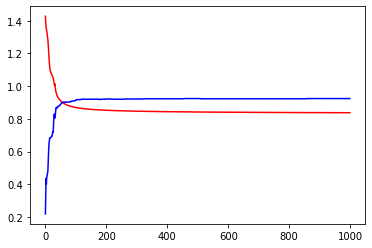

Loss before training 1.4273629188537598
Loss after training 0.8373515605926514


In [126]:
fn = FirstNetwork_v1()
fit()

In [0]:
def fit_v1(x, y, model, loss_fn, opt, epochs=100):

  for i in range(epochs):
    loss= loss_fn(model(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item()

In [128]:
fn = FirstNetwork_v1()
opt = optim.SGD(fn.parameters(), lr = 1)
fit_v1(X_train, Y_train, fn, Fun.cross_entropy, opt, epochs = 1000)

0.8404377698898315

In [129]:
device = torch.device("cuda")
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v1()
fn.to(device)
opt = optim.SGD(fn.parameters(), lr = 1)
tic = time.time()
print("final loss:", fit_v1(X_train, Y_train, fn, Fun.cross_entropy, opt, epochs = 1000))
toc = time.time()
print(toc-tic)

final loss: 0.8392848372459412
0.7813105583190918


In [0]:
class FirstNetwork_v1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024),
        nn.LeakyReLU(),
        nn.Linear(1024, 64),
        nn.LeakyReLU(),
        nn.Linear(64, 64),
        nn.LeakyReLU(),
        nn.Linear(64, 4),
        nn.Softmax()
    )
  
  def forward(self,X):
    return self.net(X)

In [170]:
device = torch.device("cuda")
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v1()
fn.to(device)
opt = optim.Adam(fn.parameters(), lr = 0.001, betas= (0.9, 0.9))
tic = time.time()
print("final loss:", fit_v1(X_train, Y_train, fn, Fun.cross_entropy, opt, epochs = 5000))
toc = time.time()
print(toc-tic)

final loss: 0.7955852150917053
9.761077165603638
